-0.00313876369039205
-0.0031387732009130116
-0.0031387732008348653
-0.003138782711387083
-0.003138782711308936
-0.0031519524775806868
-0.0031519525356950985
-0.00316518149031153
-0.0031651816088452286
-0.0031784693586131684
-0.0031784694789033937
-0.0032333940109925776
-0.003233394906268636
-0.003220422512080007
-0.0032204230290150625
-0.0032629347506243993
-0.0032629341856116535
-0.0033059892518707535
-0.0033059892344652763
-0.003349574611145331
-0.003349574591217152
-0.0034382827682826068
-0.003438282651667243
-0.003528952499963552
-0.003528952584377266
-0.003621480931795317
-0.0036214810299554263
-0.0037157674964319798
-0.003715767507901384
-0.003811714668396648
-0.003811714679977017
-0.004125802434349754
-0.0041258029024995
-0.004452934119792287
-0.00445293369494139
-0.004790818490318079
-0.004790813544129748
-0.00471749879842085
-0.004717496531134442
-0.004987775463898179
-0.004987776012435942
-0.005263060074398021
-0.005263059254109212
-0.005542831587619963
-0.005542831303765104


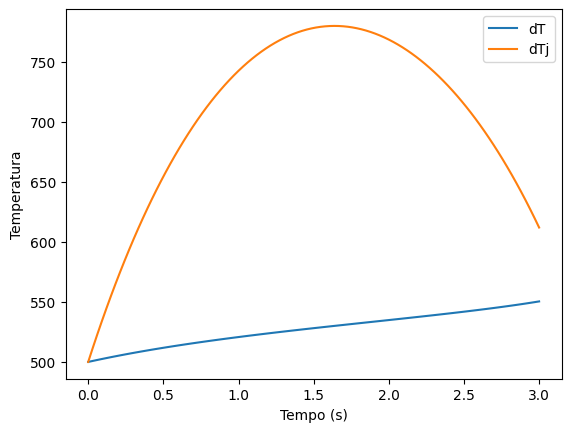

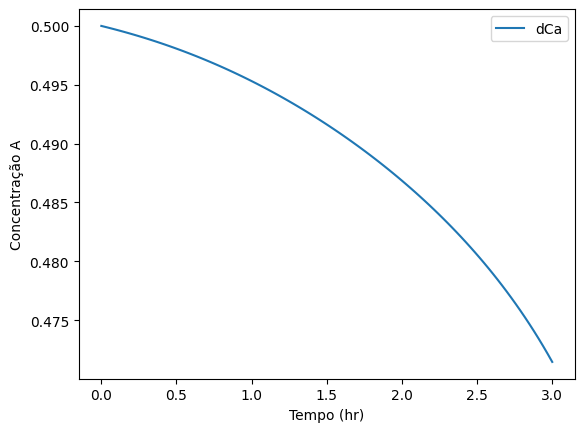

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import exp

    # VARIAVEIS DO REATOR

CAo    = 0.5    # Concentração do fluido A na entrada;
rho    = 50.0    # Densidade do fluido A;
_u      = 150.0    # Energia;
_a      = 250.0    # Área do reator;
_v      = 48.0    # Volume interno do Reator;
Fo     = 40.0    # Fluxo na entrada do reator;
To     = 530.0
lbd     = -3e4 

    # VARIAVEIS DA CAMISA

Fj     = 49.9    # Fluxo da camisa;
Vj     = 3.85    # Volume da camisa;
Cj     = 1.0       # Concentração do fluido refrigerante
Cp     = 0.75
rhoj   = 62.3    # Densidade do fluido refrigerante;
Toj    = 530.0

# Cálculo da taxa de reação de Arrhenius
def k(T):
    E       = 3e4        # activation energy J/gmol
    R       = 1.99      # gas constant J/gmol/K
    alfa      = 7.8e10    # Arrhenius rate constant 1/min
    return alfa * np.exp(-E/R/T)

def odes(x,t):

    Ca  = x[0] # Concentração interna do reator;
    Tj  = x[1] # Temperatura interna jaqueta;
    T   = x[1] # Temperatura interna do reator;

    # if T < 800:
    #     ko = k(T)
    # else:
    #     ko = 0.1
    ko = k(T)

    dCadt  = (Fo/_v) * (CAo - Ca) - (ko * Ca)
    dTdt   = (Fo/_v) * (To - T) - (Ca * lbd * ko)/(rho * Cp) - (_u * _a) * (T - Tj)/(rho * Cp * _v)
    dTjdt  = (Fj/Vj) * (Toj - Tj) + (_u * _a) * (T - Tj)/(rhoj * Cj * Vj)

    print(dCadt)

    return dCadt, dTdt, dTjdt


x0 = [0.5,500, 500]
t = np.linspace(0,3,100)
x = odeint(odes, x0, t)
# x, infodict = odeint(odes, x0, t, full_output = True)

data = pd.DataFrame(x)
print(data)


A = x[:,0]
B = x[:,1]
C = x[:,2]

# print(f"o valor de A ==> {A}")
# print(f"o valor de B ==> {B}")
# print(f"o valor de C ==> {C}")

plt.plot(t,B,label='dT')
plt.plot(t,C,label='dTj')
plt.legend()
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura")
plt.show()

plt.plot(t,A,label='dCa')
plt.legend()
plt.xlabel("Tempo (hr)")
plt.ylabel("Concentração A")
plt.show()
plt.show()
